# **K-Means Algoritması**  
K-Means, gözlem birimlerini birbirine olan benzerliklerine göre kümelere ayırmayı amaçlayan bir kümeleme yöntemidir. Kümeleme yöntemlerinin genel amacı, benzerlik matrislerini kullanarak gözlem birimlerini veya değişkenleri gruplandırmaktır.

### K-Means Algoritmasının Adımları:
1. **Küme Sayısının Belirlenmesi:**  
   Kullanıcı tarafından, veri setindeki kümelerin sayısı (K) belirlenir. K genellikle önceden bilinir veya yöntemler (örneğin Elbow Method) kullanılarak tahmin edilir.

2. **Rastgele K Merkezinin Seçilmesi:**  
   Başlangıçta, veri uzayında rastgele olarak K adet merkez noktası seçilir. Bu noktalar, başlangıçta kümelerin merkezlerini temsil eder.

3. **Her Gözlem İçin Uzaklıkların Hesaplanması:**  
   Her bir gözlem biriminin, K merkezine olan uzaklıkları hesaplanır. Uzaklık ölçütü genellikle **Öklid Uzaklığı**dır.

4. **Kümeye Atama:**  
   Her gözlem birimi, kendisine en yakın olan merkeze atanır. Böylece gözlemler kümelere yerleştirilir.

5. **Merkezlerin Güncellenmesi:**  
   Her küme için, o kümedeki gözlem birimlerinin aritmetik ortalaması alınarak yeni küme merkezleri hesaplanır.

6. **İşlemin Tekrarlanması:**  
   Gözlemlerin kümelere atanması ve merkezlerin güncellenmesi işlemleri belirli bir **iterasyon sayısına** kadar tekrarlanır. Alternatif olarak, küme merkezlerinde bir değişiklik gözlenmediği durumda (model yakınsama sağladığında) algoritma durdurulabilir.

7. **Sonuçların Değerlendirilmesi:**  
   Kümeleme işlemi sonucunda, **küme içi hata kareler toplamının (Within-Cluster Sum of Squares - WCSS)** minimum olduğu durum nihai kümelenme yapısı olarak kabul edilir.

---

### K-Means ile İlgili Önemli Notlar:
- **Küme İçi Benzerlik:**  
  Aynı kümede bulunan gözlemler arasındaki benzerlik **maksimum** olmalıdır. Bu, kümelerin homojenliğini sağlar.

- **Kümeler Arası Farklılık:**  
  Farklı kümeler arasındaki benzerlik ise **minimum** olmalıdır. Bu, kümeler arasındaki ayrışmayı artırır.

In [1]:
# K-Means uygulama

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:
df=pd.read_csv(r"C:\Users\Emirhan Tozlu\Desktop\machine learning\Denetimsiz öğrenme modelleri\Veri seti\USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


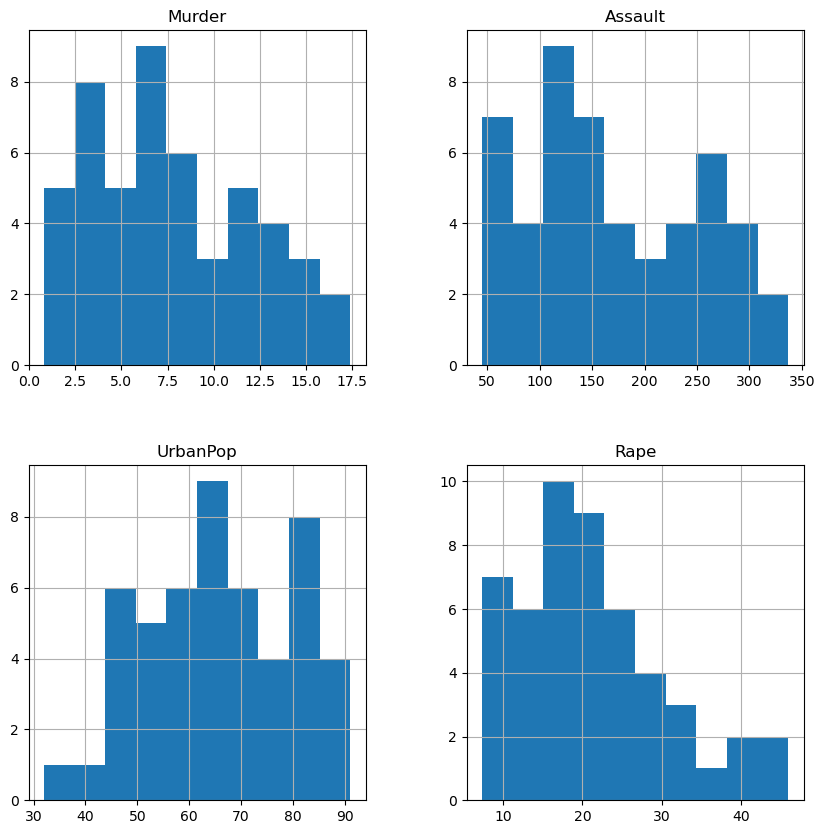

In [7]:
df.hist(figsize=(10,10));

In [8]:
kmeans=KMeans(n_clusters = 4)

In [9]:
k_fit=kmeans.fit(df)

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
k_fit.n_clusters

4

In [11]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [12]:
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [13]:
# Kümelerin görselleştirilmesi

In [14]:
k_means=KMeans(n_clusters=2).fit(df)

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
kumeler=k_means.labels_
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

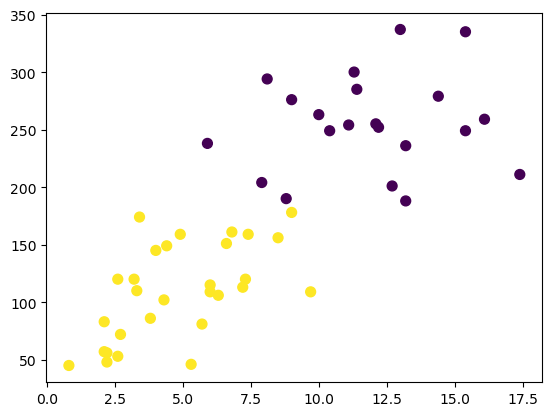

In [16]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=kumeler, s=50,cmap="viridis");

In [17]:
merkezler=k_means.cluster_centers_

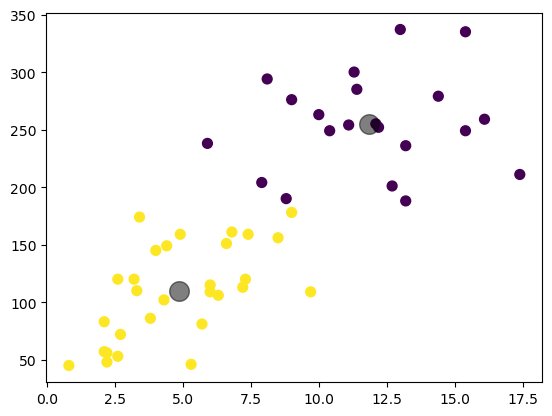

In [18]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=kumeler, s=50,cmap="viridis");
plt.scatter(merkezler[:,0],merkezler[:,1],c="black", s=200, alpha=0.5);

In [19]:
# Optimum küme sayısının belirlenmesi

# Elbow Yöntemi

In [20]:
ssd = []
K=range(1,30)

for k in K:
    kmeans= KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

Text(0.5, 1.0, 'Optimum Küme sayısı için Elbow Yöntemi')

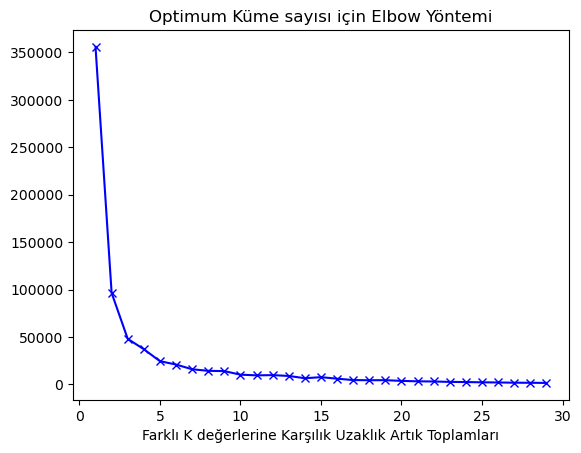

In [21]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")

In [22]:
# Başka bir yöntem

In [23]:
!pip install yellowbrick

In [24]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

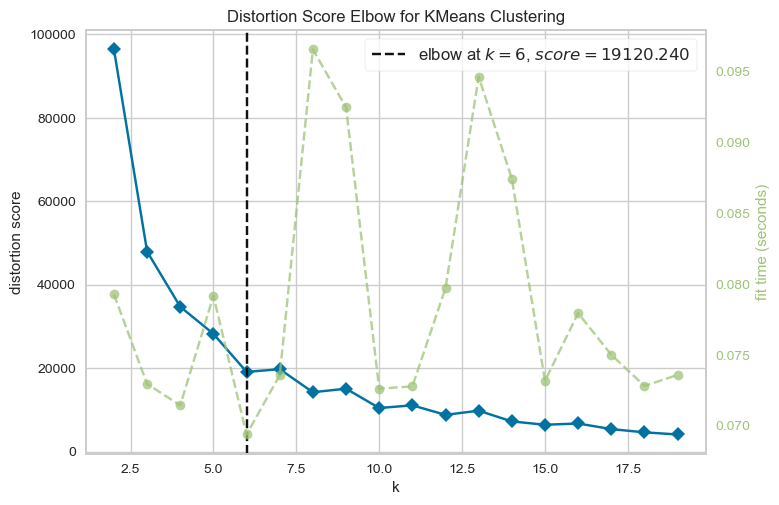

In [25]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(2,20))
visu.fit(df)
visu.poof();

In [26]:
kmeans=KMeans(n_clusters = 4 ).fit(df)
kmeans

C:\Users\Emirhan Tozlu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
kumeler=kmeans.labels_

In [28]:
pd.DataFrame({"Eyaletler":df.index, "Kümeler":kumeler})

,Eyaletler,Kümeler
0,Alabama,0
1,Alaska,0
2,Arizona,3
3,Arkansas,1
4,California,3
5,Colorado,1
6,Connecticut,2
7,Delaware,0
8,Florida,3
9,Georgia,1


In [29]:
df["Kume_No"]=kumeler
df

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,1
